
<img src="https://raw.githubusercontent.com/dataitgirls2/10minutes2pandas/master/_layouts/og_image_trsp.png" width="60%">

>[Pandas 10분 완성](https://dataitgirls2.github.io/10minutes2pandas/)
> 1. Object Creation (객체 생성)
> 2. Viewing Data (데이터 확인하기)
> 3. Selection (선택)
> 4. Missing Data (결측치)
> 5. Operation (연산)
> 6. Merge (병합)
> 7. Grouping (그룹화)
> 8. Reshaping (변형)
> 9. Time Series (시계열)
> 10. Categoricals (범주화)
> 11. Plotting (그래프)
> 12. Getting Data In / Out (데이터 입 / 출력)
> 13. Gotchas (잡았다!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation (객체 생성)
> *[데이터 구조 소개 섹션](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) 을 참조*</br>
>
>Pandas는 값을 가지고 있는 리스트를 통해 Series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러올 것입니다.

In [2]:
s = pd.Series([1, 3, 5,np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

>datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만듭니다.

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.785347,0.574925,-0.676452,1.813467
2013-01-02,-0.257480,-0.100852,-0.784089,0.151827
2013-01-03,-1.580742,0.080017,2.600976,2.022480
2013-01-04,1.026957,-0.587041,1.167862,-0.989285
2013-01-05,2.339449,0.110415,0.381784,0.437112
2013-01-06,1.293271,0.855742,-0.126445,0.393147


> Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터프레임을 만듭니다.

In [5]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D' : np.array([3]  * 4, dtype='int32'),
                    'E' : pd.Categorical(['test', 'train', 'test', 'train']),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data (데이터 확인하기)
>[Basic Section](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)을 참조

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.785347,0.574925,-0.676452,1.813467
2013-01-02,-0.257480,-0.100852,-0.784089,0.151827
2013-01-03,-1.580742,0.080017,2.600976,2.022480
2013-01-04,1.026957,-0.587041,1.167862,-0.989285
2013-01-05,2.339449,0.110415,0.381784,0.437112


In [8]:
df.tail()

,A,B,C,D
2013-01-02,-0.257480,-0.100852,-0.784089,0.151827
2013-01-03,-1.580742,0.080017,2.600976,2.022480
2013-01-04,1.026957,-0.587041,1.167862,-0.989285
2013-01-05,2.339449,0.110415,0.381784,0.437112
2013-01-06,1.293271,0.855742,-0.126445,0.393147


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 0.7853474 ,  0.57492478, -0.67645156,  1.81346717],
       [-0.25747977, -0.10085236, -0.7840888 ,  0.15182715],
       [-1.58074229,  0.08001677,  2.60097635,  2.02248013],
       [ 1.02695658, -0.58704088,  1.16786166, -0.98928452],
       [ 2.33944948,  0.11041531,  0.38178412,  0.43711213],
       [ 1.29327129,  0.85574184, -0.12644472,  0.39314728]])

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.601134,0.155534,0.427273,0.638125
std,1.357487,0.508148,1.285903,1.121003
min,-1.580742,-0.587041,-0.784089,-0.989285
25%,0.003227,-0.055635,-0.538950,0.212157
50%,0.906152,0.095216,0.127670,0.415130
75%,1.226693,0.458797,0.971342,1.469378
max,2.339449,0.855742,2.600976,2.022480


> 행 과 열 전치.

In [13]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.785347,-0.257480,-1.580742,1.026957,2.339449,1.293271
B,0.574925,-0.100852,0.080017,-0.587041,0.110415,0.855742
C,-0.676452,-0.784089,2.600976,1.167862,0.381784,-0.126445
D,1.813467,0.151827,2.022480,-0.989285,0.437112,0.393147


> 축 별 정렬

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.813467,-0.676452,0.574925,0.785347
2013-01-02,0.151827,-0.784089,-0.100852,-0.257480
2013-01-03,2.022480,2.600976,0.080017,-1.580742
2013-01-04,-0.989285,1.167862,-0.587041,1.026957
2013-01-05,0.437112,0.381784,0.110415,2.339449
2013-01-06,0.393147,-0.126445,0.855742,1.293271


> 값 별 정렬

In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,1.026957,-0.587041,1.167862,-0.989285
2013-01-02,-0.257480,-0.100852,-0.784089,0.151827
2013-01-03,-1.580742,0.080017,2.600976,2.022480
2013-01-05,2.339449,0.110415,0.381784,0.437112
2013-01-01,0.785347,0.574925,-0.676452,1.813467
2013-01-06,1.293271,0.855742,-0.126445,0.393147


## Selection (선택)
> 주석 (Note) : 선택과 설정을 위한 Python / Numpy의 표준화된 표현들이 직관적

> 코드 작성을 위한 양방향 작업에 유용하지만 Pandas에 최적화된 데이터 접근 방법인 <u>"*.at, .iat, .loc 및 .iloc*"</u> 을 추천
>
> *[데이터 인덱싱 및 선택](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) 문서와 [다중 인덱싱 / 심화 인덱싱 문서](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)를 참조*
### Getting (데이터 얻기)
> df.A 와 동일한 Series를 생성하는 단일의 열 선택

In [16]:
df['A']

2013-01-01    0.785347
2013-01-02   -0.257480
2013-01-03   -1.580742
2013-01-04    1.026957
2013-01-05    2.339449
2013-01-06    1.293271
Freq: D, Name: A, dtype: float64

> row indexing

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,0.785347,0.574925,-0.676452,1.813467
2013-01-02,-0.257480,-0.100852,-0.784089,0.151827
2013-01-03,-1.580742,0.080017,2.600976,2.022480


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.257480,-0.100852,-0.784089,0.151827
2013-01-03,-1.580742,0.080017,2.600976,2.022480
2013-01-04,1.026957,-0.587041,1.167862,-0.989285


### Selection by Label (Label 을 통한 선택) loc[]
> *[Label을 통한 선택](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) 참조*
>
> loc indexing (dates는 위에서 row 인덱스로 지정)

In [19]:
df.loc[dates[0]]

A    0.785347
B    0.574925
C   -0.676452
D    1.813467
Name: 2013-01-01 00:00:00, dtype: float64

> loc 라벨을 사용하여 다중 column 가져오기

In [20]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.785347,0.574925
2013-01-02,-0.257480,-0.100852
2013-01-03,-1.580742,0.080017
2013-01-04,1.026957,-0.587041
2013-01-05,2.339449,0.110415
2013-01-06,1.293271,0.855742


> row 는 인덱싱 column 은 지정하는 형식 (test. 2번째줄의 결과는 같다.)

In [21]:
df.loc['20130102' : '20130104', ['A', 'B']]
# df.loc['20130102' : '20130104', 'A' : 'B']

,A,B
2013-01-02,-0.257480,-0.100852
2013-01-03,-1.580742,0.080017
2013-01-04,1.026957,-0.587041


> 반환되는 객체의 차원를 줄입니다. (type = pandas.core.series.Series)

In [22]:
df.loc['20130102',['A','B']]

A   -0.257480
B   -0.100852
Name: 2013-01-02 00:00:00, dtype: float64

> 특정 행열의 스칼라 값을 가져온다.

In [23]:
df.loc[dates[0],'A']

0.7853474040428359

> 스칼라 값만 가져오는 방법 (loc와 비슷함, <u>"*at*"</u> if you only need to get or set a single value in a DataFrame
or Series.)

In [24]:
df.at[dates[0], 'A']
# df.at?

0.7853474040428359

### Selection by Position (위치로 선택하기) iloc[]
> *자세한 내용은 [위치로 선택하기](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)를 참고* </br>
>
> index로 위치 선택

In [25]:
df.iloc[3]

A    1.026957
B   -0.587041
C    1.167862
D   -0.989285
Name: 2013-01-04 00:00:00, dtype: float64

> numpy / python과 유사하게 slicing

In [26]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.026957,-0.587041
2013-01-05,2.339449,0.110415


> 리스트형태로 원하는 행과 열만 뽑니다. (numpy / python의 스타일)

In [27]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.257480,-0.784089
2013-01-03,-1.580742,2.600976
2013-01-05,2.339449,0.381784


> 명시적으로 행으로 나누기

In [28]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.257480,-0.100852,-0.784089,0.151827
2013-01-03,-1.580742,0.080017,2.600976,2.022480


> 명시적으로 열로 나누기

In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.574925,-0.676452
2013-01-02,-0.100852,-0.784089
2013-01-03,0.080017,2.600976
2013-01-04,-0.587041,1.167862
2013-01-05,0.110415,0.381784
2013-01-06,0.855742,-0.126445


> 명시적으로 특정(스칼라) 값을 얻을때

In [30]:
df.iloc[1,1]

-0.10085235705482462

> 스칼라 값을 빠르게 얻는 방법입니다 (위의 방식과 동일합니다).

In [31]:
df.iat[1,1]

-0.10085235705482462

### Boolean Indexing
>데이터를 선택하기 위해 특정 열의 값을 기준으로 사용

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.785347,0.574925,-0.676452,1.813467
2013-01-04,1.026957,-0.587041,1.167862,-0.989285
2013-01-05,2.339449,0.110415,0.381784,0.437112
2013-01-06,1.293271,0.855742,-0.126445,0.393147


> Boolean 조건을 충족하는 DataFrame 에서 값을 선택

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,0.785347,0.574925,NaN,1.813467
2013-01-02,NaN,NaN,NaN,0.151827
2013-01-03,NaN,0.080017,2.600976,2.022480
2013-01-04,1.026957,NaN,1.167862,NaN
2013-01-05,2.339449,0.110415,0.381784,0.437112
2013-01-06,1.293271,0.855742,NaN,0.393147


> isin() 필터링을 위한 메소드

In [34]:
df2 = df.copy()

In [35]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.785347,0.574925,-0.676452,1.813467,one
2013-01-02,-0.257480,-0.100852,-0.784089,0.151827,one
2013-01-03,-1.580742,0.080017,2.600976,2.022480,two
2013-01-04,1.026957,-0.587041,1.167862,-0.989285,three
2013-01-05,2.339449,0.110415,0.381784,0.437112,four
2013-01-06,1.293271,0.855742,-0.126445,0.393147,three


In [36]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.580742,0.080017,2.600976,2.022480,two
2013-01-05,2.339449,0.110415,0.381784,0.437112,four


### Setting (설정)
> 새 열을 설정하면 데이터가 인덱스 별로 자동 정렬

In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df['f'] = s1

> 라벨로 값 설정 (0 행 A 열 값을 0으로)

In [39]:
df.at[dates[0], 'A'] = 0

> 위치로 값 설정

In [40]:
df.iat[0, 1] = 0

> Numpy 배열을 사용하여 값 설정

In [41]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,f
2013-01-01,0.000000,0.000000,-0.676452,5,NaN
2013-01-02,-0.257480,-0.100852,-0.784089,5,1.0
2013-01-03,-1.580742,0.080017,2.600976,5,2.0
2013-01-04,1.026957,-0.587041,1.167862,5,3.0
2013-01-05,2.339449,0.110415,0.381784,5,4.0
2013-01-06,1.293271,0.855742,-0.126445,5,5.0


> where 연산을 설정

In [42]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,f
2013-01-01,0.000000,0.000000,-0.676452,-5,NaN
2013-01-02,-0.257480,-0.100852,-0.784089,-5,-1.0
2013-01-03,-1.580742,-0.080017,-2.600976,-5,-2.0
2013-01-04,-1.026957,-0.587041,-1.167862,-5,-3.0
2013-01-05,-2.339449,-0.110415,-0.381784,-5,-4.0
2013-01-06,-1.293271,-0.855742,-0.126445,-5,-5.0


## Missing Data (결측치)
> Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용
>
> 이 방법은 기본 설정값이지만 계산에는 포함되지 않는다. [Missing data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)을 참조
>
>Reindexing으로 지정된 축 상의 인덱스를 변경 / 추가 / 삭제 할 수 있다.
>
>Reindexing은 데이터의 복사본을 반환

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [44]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [45]:
df1

,A,B,C,D,f,E
2013-01-01,0.000000,0.000000,-0.676452,5,NaN,1.0
2013-01-02,-0.257480,-0.100852,-0.784089,5,1.0,1.0
2013-01-03,-1.580742,0.080017,2.600976,5,2.0,NaN
2013-01-04,1.026957,-0.587041,1.167862,5,3.0,NaN


> 결측치를 가지고 있는 행 삭제

In [46]:
df1.dropna(how='any')

,A,B,C,D,f,E
2013-01-02,-0.25748,-0.100852,-0.784089,5,1.0,1.0


> 결측치 채워넣기

In [47]:
df1.fillna(value=5)

,A,B,C,D,f,E
2013-01-01,0.000000,0.000000,-0.676452,5,5.0,1.0
2013-01-02,-0.257480,-0.100852,-0.784089,5,1.0,1.0
2013-01-03,-1.580742,0.080017,2.600976,5,2.0,5.0
2013-01-04,1.026957,-0.587041,1.167862,5,3.0,5.0


> NaN 값을 boolean을 통해 표시
>
> <u>"*isna()*"</u> 값이 있는 데이터는 False, NAN인 값은 True 로 표시

In [48]:
pd.isna(df1)

,A,B,C,D,f,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operation (연산)

> [이진 (Binary) 연산의 기본섹션](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) 참조
### Stats (통계)
> 일반적으로 결측치를 제외한 후 연산
> 기술통계를 수행한다.
>
> <u>"*mean()*"</u> 기본은 columns

In [49]:
df.mean()

A    0.470243
B    0.059713
C    0.427273
D    5.000000
f    3.000000
dtype: float64

> rows axes

In [50]:
df.mean(1)

2013-01-01    1.080887
2013-01-02    0.971516
2013-01-03    1.620050
2013-01-04    1.921555
2013-01-05    2.366330
2013-01-06    2.404514
Freq: D, dtype: float64

정렬이 필요하며, 차원이 다른 객체로 연산해보겠습니다.

또한, pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅됩니다.

역자 주 : broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미

shift???? </br>
sub????

In [51]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [52]:
df.sub(s, axis='index')

,A,B,C,D,f
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.580742,-0.919983,1.600976,4.0,1.0
2013-01-04,-1.973043,-3.587041,-1.832138,2.0,0.0
2013-01-05,-2.660551,-4.889585,-4.618216,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply (적용)
> 데이터에 함수를 적용

In [53]:
df.apply(np.cumsum)

,A,B,C,D,f
2013-01-01,0.000000,0.000000,-0.676452,5,NaN
2013-01-02,-0.257480,-0.100852,-1.460540,10,1.0
2013-01-03,-1.838222,-0.020836,1.140436,15,3.0
2013-01-04,-0.811265,-0.607876,2.308298,20,6.0
2013-01-05,1.528184,-0.497461,2.690082,25,10.0
2013-01-06,2.821455,0.358281,2.563637,30,15.0


In [54]:
df.apply(lambda x: x.max() - x.min())

A    3.920192
B    1.442783
C    3.385065
D    0.000000
f    4.000000
dtype: float64

### Histogramming (히스토그래밍)
> [Histogramming and Discretization (히스토그래밍과 이산화)](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) 참조

In [55]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [56]:
s

0    5
1    5
2    6
3    6
4    0
5    4
6    0
7    3
8    4
9    5
dtype: int32

In [57]:
s.value_counts()

5    3
6    2
0    2
4    2
3    1
dtype: int64

### String Methods (문자열 메소드)
>Series는 문자열 처리 메소드 모음 (set)을 가지고 있다.
>
>이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함되어 있습니다.
>
>문자열의 패턴 일치 확인은 기본적으로 정규 표현식을 사용, 몇몇의 경우 항상 정규 표현식을 사용함에 유의.

>좀 더 자세한 내용은 [벡터화된 문자열 메소드](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) 부분에서 확인할 수 있습니다.

In [58]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'caba', 'dog', 'cat'])

In [59]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge (병합)
### Concat (연결)
>결합 (join) / 병합 (merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 <u>Series, DataFrame, Panel</u> 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas 에서 제공
>
>[Merging](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) 참조.
>
>[concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)으로 pandas 객체를 연결.

In [60]:
df = pd.DataFrame(np.random.randn(10, 4))

In [61]:
df

,0,1,2,3
0,0.304719,0.003514,0.306091,-1.129754
1,-0.952811,0.715470,-1.107166,1.338748
2,-1.724219,-0.324601,2.282762,-0.651907
3,-0.165102,-0.210474,-0.651731,-1.125505
4,-1.386691,-0.667016,-0.835811,0.141024
5,-0.855057,-0.299879,1.422138,0.330176
6,-1.632346,0.255697,-0.162283,-0.341932
7,1.232764,-1.288877,1.255990,0.251345
8,-0.186698,1.142399,-0.680933,-0.344887
9,-0.241755,-0.753823,0.401576,-0.621226


In [62]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.304719  0.003514  0.306091 -1.129754
 1 -0.952811  0.715470 -1.107166  1.338748
 2 -1.724219 -0.324601  2.282762 -0.651907,
           0         1         2         3
 3 -0.165102 -0.210474 -0.651731 -1.125505
 4 -1.386691 -0.667016 -0.835811  0.141024
 5 -0.855057 -0.299879  1.422138  0.330176
 6 -1.632346  0.255697 -0.162283 -0.341932,
           0         1         2         3
 7  1.232764 -1.288877  1.255990  0.251345
 8 -0.186698  1.142399 -0.680933 -0.344887
 9 -0.241755 -0.753823  0.401576 -0.621226]

In [63]:
pd.concat(pieces)

,0,1,2,3
0,0.304719,0.003514,0.306091,-1.129754
1,-0.952811,0.715470,-1.107166,1.338748
2,-1.724219,-0.324601,2.282762,-0.651907
3,-0.165102,-0.210474,-0.651731,-1.125505
4,-1.386691,-0.667016,-0.835811,0.141024
5,-0.855057,-0.299879,1.422138,0.330176
6,-1.632346,0.255697,-0.162283,-0.341932
7,1.232764,-1.288877,1.255990,0.251345
8,-0.186698,1.142399,-0.680933,-0.344887
9,-0.241755,-0.753823,0.401576,-0.621226


### join (결합)
> <u>"*SQL*"</u> 방식으로 병합. [데이터베이스 스타일 결합](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) 참고.

In [64]:
left = pd.DataFrame({'key' : ['foo', 'foo'], 'lval' : [1, 2]})
right = pd.DataFrame({'key' : ['foo', 'foo'], 'rval' : [4, 5]})

In [65]:
left

,key,lval
0,foo,1
1,foo,2


In [66]:
right

,key,rval
0,foo,4
1,foo,5


In [67]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


> 다른 ex)

In [68]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key' : ['foo', 'bar'], 'rval' : [4, 5]})

In [69]:
left

,key,lval
0,foo,1
1,bar,2


In [70]:
right

,key,rval
0,foo,4
1,bar,5


In [71]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append (추가)
> 데이터프레임에 행을 추가합니다. [Appending](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) 참조.

In [72]:
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])

In [73]:
df

,A,B,C,D
0,-0.325341,-1.958824,-0.045496,1.267608
1,1.643950,-1.047896,-1.006793,-0.343627
2,-0.169113,0.401731,1.222657,0.330091
3,2.134742,-0.049266,-0.204954,-1.956396
4,0.633707,-2.129758,2.197799,-1.145079
5,-0.779638,1.215200,-0.602158,-0.236067
6,-0.203648,0.771048,-0.361401,1.062034
7,-0.621182,0.564908,0.623154,0.707101


In [74]:
s = df.loc[3]
s

A    2.134742
B   -0.049266
C   -0.204954
D   -1.956396
Name: 3, dtype: float64

In [75]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.325341,-1.958824,-0.045496,1.267608
1,1.643950,-1.047896,-1.006793,-0.343627
2,-0.169113,0.401731,1.222657,0.330091
3,2.134742,-0.049266,-0.204954,-1.956396
4,0.633707,-2.129758,2.197799,-1.145079
5,-0.779638,1.215200,-0.602158,-0.236067
6,-0.203648,0.771048,-0.361401,1.062034
7,-0.621182,0.564908,0.623154,0.707101
8,2.134742,-0.049266,-0.204954,-1.956396


## Grouping (그룹화)
> 그룹화는 다음 단계 중 하나 이상을 포함하는 과정이다.
>> 몇몇 기준에 따라 여러 그룹으로 데이터를 분할 (splitting)
>>
>>각 그룹에 독립적으로 함수를 적용 (applying)
>>
>>결과물들을 하나의 데이터 구조로 결합 (combining)
>
> [그룹화](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) 참조

In [76]:
df = pd.DataFrame(
    {'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
     'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
     'C' : np.random.randn(8),
     'D' : np.random.randn(8) })

In [77]:
df

,A,B,C,D
0,foo,one,0.377180,0.728539
1,bar,one,-0.188997,-0.439058
2,foo,two,-0.288064,-1.622979
3,bar,three,1.279133,1.013023
4,foo,two,-0.290891,-1.419830
5,bar,two,1.216758,1.526045
6,foo,one,-1.173370,-1.022218
7,foo,three,-0.653563,0.546749


> 데이터프레임을 그룹, sum()

In [78]:
df.groupby('A').sum()

,C,D
A,,
bar,2.306893,2.100011
foo,-2.028707,-2.789739


>여러 열을 기준으로 그룹화하면 게층적 인덱스가 형성됨. 여기에도 sum()

In [79]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.188997 -0.439058
    three  1.279133  1.013023
    two    1.216758  1.526045
foo one   -0.796189 -0.293680
    three -0.653563  0.546749
    two   -0.578955 -3.042809

## Reshaping (변형)
> [계층적 인덱싱](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) 및 [변형](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html) 참조.
>
### Stack (스택)

In [80]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [81]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [82]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.004020 -0.069292
      two     0.757920 -1.628321
baz   one     0.171576  1.188046
      two     1.423206  0.083599
foo   one     0.081555 -1.221909
      two    -0.961248  0.373906
qux   one    -0.031730  0.340119
      two     0.644432 -0.666264

In [83]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.004020 -0.069292
      two     0.757920 -1.628321
baz   one     0.171576  1.188046
      two     1.423206  0.083599

> [stack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html) 메소드는 데이터프레임 열들의 계층을 “압축”합니다.

In [84]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.004020
               B   -0.069292
       two     A    0.757920
               B   -1.628321
baz    one     A    0.171576
               B    1.188046
       two     A    1.423206
               B    0.083599
dtype: float64

>“Stack된” 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우,
>
>[stack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)의 역 연산은 [unstack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)이며, 기본적으로 마지막 계층을 unstack합니다.

In [85]:
stacked.unstack()

A         B
first second                    
bar   one     1.004020 -0.069292
      two     0.757920 -1.628321
baz   one     0.171576  1.188046
      two     1.423206  0.083599

In [86]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.004020  0.757920
      B -0.069292 -1.628321
baz   A  0.171576  1.423206
      B  1.188046  0.083599

In [87]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.004020  0.171576
       B -0.069292  1.188046
two    A  0.757920  1.423206
       B -1.628321  0.083599

### Pivot Tables (피봇 테이블)
> [피봇 테이블](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html) 부분을 참조하세요.

In [88]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [89]:
df

,A,B,C,D,E
0,one,A,foo,1.801419,0.045803
1,one,B,foo,0.040948,-0.973926
2,two,C,foo,0.124113,-0.015929
3,three,A,bar,-0.659902,0.688914
4,one,B,bar,1.659207,0.668836
5,one,C,bar,-0.161224,1.318797
6,two,A,foo,-0.397792,-0.563962
7,three,B,foo,0.999141,2.089469
8,one,C,foo,-0.082879,-0.140857
9,one,A,bar,-1.115809,1.404361


> pivot table 생성

In [90]:
pd.pivot_table(df, values='D', index=['A','B'], columns='C')

C             bar       foo
A     B                    
one   A -1.115809  1.801419
      B  1.659207  0.040948
      C -0.161224 -0.082879
three A -0.659902       NaN
      B       NaN  0.999141
      C  0.096035       NaN
two   A       NaN -0.397792
      B -0.598951       NaN
      C       NaN  0.124113

## Time Series (시계열) (요건 좀... 모르겠...)
>Pandas는 자주 일어나는 변환 (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공합니다.
>
>이는 재무 (금융) 응용에서 매우 일반적이지만 이에 국한되지는 않습니다.
>
>[시계열](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) 부분을 참고.

In [91]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [92]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [93]:
ts

2012-01-01 00:00:00    462
2012-01-01 00:00:01    495
2012-01-01 00:00:02     89
2012-01-01 00:00:03    248
2012-01-01 00:00:04    377
                      ... 
2012-01-01 00:01:35    348
2012-01-01 00:01:36    276
2012-01-01 00:01:37    269
2012-01-01 00:01:38    370
2012-01-01 00:01:39    161
Freq: S, Length: 100, dtype: int32

In [94]:
ts.resample('5Min').sum()

2012-01-01    24319
Freq: 5T, dtype: int32

> 시간대 표현

In [95]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [96]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [97]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [98]:
ts

2012-03-06    0.320022
2012-03-07   -1.892803
2012-03-08   -0.428876
2012-03-09   -0.889668
2012-03-10    1.335654
Freq: D, dtype: float64

In [99]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.320022
2012-03-07 00:00:00+00:00   -1.892803
2012-03-08 00:00:00+00:00   -0.428876
2012-03-09 00:00:00+00:00   -0.889668
2012-03-10 00:00:00+00:00    1.335654
Freq: D, dtype: float64

> 다른 시간대 반환

In [100]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.320022
2012-03-06 19:00:00-05:00   -1.892803
2012-03-07 19:00:00-05:00   -0.428876
2012-03-08 19:00:00-05:00   -0.889668
2012-03-09 19:00:00-05:00    1.335654
Freq: D, dtype: float64

> 시간 표현 ↔ 기간 표현으로 변환합니다.

In [101]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [102]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [103]:
ts

2012-01-31   -0.303403
2012-02-29    0.259000
2012-03-31    0.348480
2012-04-30   -1.085448
2012-05-31    0.104353
Freq: M, dtype: float64

In [104]:
ps = ts.to_period()

In [105]:
ps

2012-01   -0.303403
2012-02    0.259000
2012-03    0.348480
2012-04   -1.085448
2012-05    0.104353
Freq: M, dtype: float64

In [106]:
ps.to_timestamp()

2012-01-01   -0.303403
2012-02-01    0.259000
2012-03-01    0.348480
2012-04-01   -1.085448
2012-05-01    0.104353
Freq: MS, dtype: float64

>기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줍니다.
>
>다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환합니다.

In [107]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [108]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [109]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [110]:
ts.head()

1990-03-01 09:00    0.007426
1990-06-01 09:00   -0.885542
1990-09-01 09:00   -0.211458
1990-12-01 09:00    0.854950
1991-03-01 09:00   -1.067597
Freq: H, dtype: float64

## Categoricals (범주화)
> **Pandas**는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다.
>
>[범주형 소개](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) 와 [API 문서](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) 부분을 참조하세요.



In [111]:
df = pd.DataFrame({'id':[1, 2, 3, 4, 5, 6], 'raw_grade':['a','b','b','a','a','e']})
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

> 범주에 더 의미 있는 이름을 붙이기(Series.cat.categories)  
> ex) pd.Series.cat.categories

In [112]:
df['grade'].cat.categories = ['very good','good','very bad']
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


> 범주의 순서를 바꿈과 동시에 누락된 범주 추가 (Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환합니다).

In [113]:
df['grade'] = df['grade'].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

>정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열됨
>
>위에서 "very bad", "bad", "medium", "good", "very good"  순서로 기재되어 있기 때문에 정렬 결과도 그 순서를 따름

In [114]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


> 범주의 열을 기준으로 그룹화하면 빈 범주도 표시됨

In [115]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting (그래프)
> [Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) 참조

In [116]:
import matplotlib.pyplot as plt

In [117]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [118]:
ts = ts.cumsum()

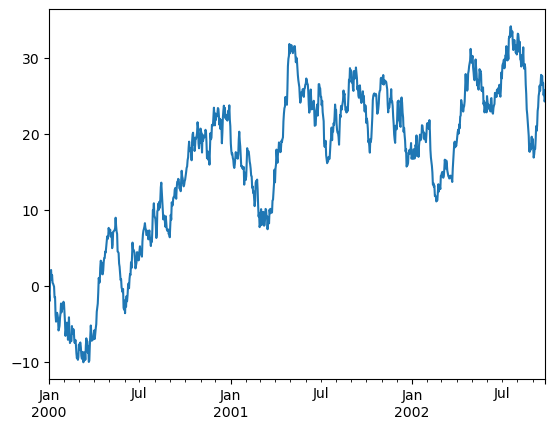

In [119]:
ts.plot()
plt.show()

> DataFrame 에서 [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) 메소도는 라벨이 존재하는 모든 열을 그릴 때 편리함.

In [120]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A','B','C','D'])

In [121]:
df = df.cumsum()

<Figure size 640x480 with 0 Axes>

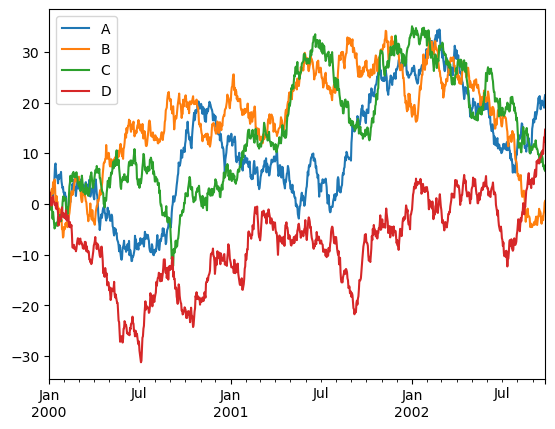

In [122]:
plt.figure(); df.plot(); plt.legend(loc='best')
plt.show()

## Getting Data In / Out (데이터 입/출력)

> [CSV](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) 파일에 읽고 쓰기

In [123]:
df.to_csv('foo.csv')
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.287729,-0.149232,-0.854338,-0.855327
1,2000-01-02,-0.663085,0.169475,0.090234,2.328347
2,2000-01-03,-0.948974,0.398880,-0.543869,0.665340
3,2000-01-04,-0.199690,1.129308,0.818797,1.157163
4,2000-01-05,1.103093,2.301665,-1.148351,1.141130
...,...,...,...,...,...
995,2002-09-22,19.511552,-3.175656,7.465219,9.870809
996,2002-09-23,19.358876,-1.970459,7.746118,11.436110
997,2002-09-24,19.009094,-1.437883,6.931270,13.160051
998,2002-09-25,20.950439,0.275998,6.730712,12.287240


> HDF5
>
> HDF5 Store에 읽고 쓰기

In [124]:
df.to_hdf('foo.h5','df')
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.287729,-0.149232,-0.854338,-0.855327
2000-01-02,-0.663085,0.169475,0.090234,2.328347
2000-01-03,-0.948974,0.398880,-0.543869,0.665340
2000-01-04,-0.199690,1.129308,0.818797,1.157163
2000-01-05,1.103093,2.301665,-1.148351,1.141130
...,...,...,...,...
2002-09-22,19.511552,-3.175656,7.465219,9.870809
2002-09-23,19.358876,-1.970459,7.746118,11.436110
2002-09-24,19.009094,-1.437883,6.931270,13.160051
2002-09-25,20.950439,0.275998,6.730712,12.287240


> Excel 에 읽고 쓰기

In [125]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.287729,-0.149232,-0.854338,-0.855327
1,2000-01-02,-0.663085,0.169475,0.090234,2.328347
2,2000-01-03,-0.948974,0.398880,-0.543869,0.665340
3,2000-01-04,-0.199690,1.129308,0.818797,1.157163
4,2000-01-05,1.103093,2.301665,-1.148351,1.141130
...,...,...,...,...,...
995,2002-09-22,19.511552,-3.175656,7.465219,9.870809
996,2002-09-23,19.358876,-1.970459,7.746118,11.436110
997,2002-09-24,19.009094,-1.437883,6.931270,13.160051
998,2002-09-25,20.950439,0.275998,6.730712,12.287240


## Gotchas (잡았다?)
> 연산 수행 시 다음과 같은 예외 상활을 볼 수도 있다.

In [126]:
if pd.Series([False, True, False]):
    print('I was true')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

>이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 한다.

In [127]:
if pd.Series([False, True, False])is not None:
    print('I was true')

I was true


>위에 대한 설명과 자세한 내용은 [비교](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) 부분을 참조하세요.
>
>[Gotchas](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html) 부분도 참조하세요.

> 본자료는 데잇걸즈2 사이트를 보고 타이핑한것임.
>
> 저작권 걸려있...